In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
my_first_array = np.array([1, 2, 3,4,5])
my_first_array

array([1, 2, 3, 4, 5])

Text(0, 0.5, 'marks scored')

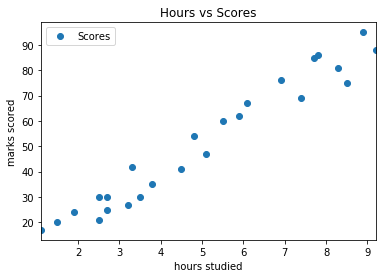

In [4]:
data = pd.read_csv('scores.csv')
data.describe()
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('hours studied')
plt.ylabel('marks scored')

In [5]:
X = data['Hours'].values.reshape(-1,1)


In [6]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores']

In [7]:
X.shape

(25, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(lr.intercept_, lr.coef_)

2.018160041434683 [9.91065648]


In [10]:
lr.intercept_?

In [11]:
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': y_test,
                  'Predicted': y_pred})
print('Root Mean Squared Error:',
     round( np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2 ))

Root Mean Squared Error: 4.65


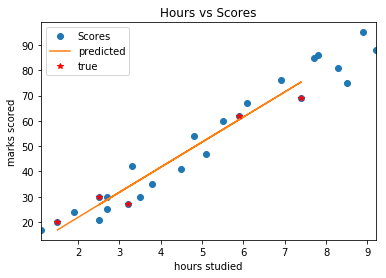

In [12]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('hours studied')
plt.ylabel('marks scored')
plt.plot(X_test, y_pred, '-', label='predicted')
plt.plot(X_test, y_test, 'r*', label='true')
plt.legend()

In [13]:
X_test.max()

7.4

In [14]:
X_test.min()

1.5

In [15]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

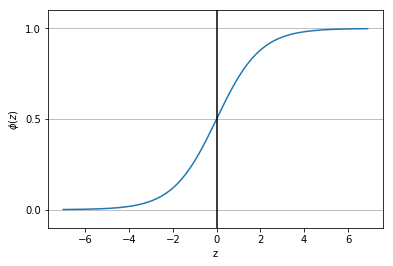

In [16]:
z = np.arange(-7,7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()  ## get current access
ax.yaxis.grid(True, linestyle='-')
plt.show()

In [17]:
## Iris data with logistic Regression

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

clf = LogisticRegression(random_state=0,
                        solver='lbfgs',
                        multi_class='multinomial')
clf.fit(X_train, y_train)

/Users/Wenz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print(clf.intercept_)

[  9.27738596   2.31301489 -11.59040085]


In [20]:
print( clf.coef_)

[[-0.39437848  0.85075029 -2.3605638  -1.01264242]
 [ 0.41008605 -0.31877288 -0.14610523 -0.78771992]
 [-0.01570757 -0.53197741  2.50666902  1.80036234]]


In [21]:
clf.score(X_test, y_test) ##R2 score

1.0